<a href="https://colab.research.google.com/github/crk-fresnostate/164-project/blob/main/164project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

In [ ]:
iris = fetch_ucirepo(id=53)
heart_disease = fetch_ucirepo(id=45)
wine_quality = fetch_ucirepo(id=186)

In [ ]:
iX = iris.data.features
iY = np.ravel(iris.data.targets)

hX = heart_disease.data.features
hY = np.ravel(heart_disease.data.targets)

wX = wine_quality.data.features
wY = np.ravel(wine_quality.data.targets)

In [ ]:
# The features 'ca' and 'thal' are the only ones that have missing values.
# There are enough other features that I think just dropping those ones
# completely is fine.
hX.dropna(axis=1, how='any', inplace=True)

# We only want to tell whether there is heart disease, not what type it is.
hY = np.ravel([1 if i else 0 for i in hY])

<ipython-input-5-7973a92c8417>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hX.dropna(axis=1, how='any', inplace=True)


In [ ]:
rs = 8

iXtr, iXte, iYtr, iYte = train_test_split(iX, iY, test_size=.3, random_state=rs)
hXtr, hXte, hYtr, hYte = train_test_split(hX, hY, test_size=.2, random_state=rs)
wXtr, wXte, wYtr, wYte = train_test_split(wX, wY, test_size=.1, random_state=rs)

sc = StandardScaler()

sc.fit(iXtr)
iXtr_s = sc.transform(iXtr)
iXte_s = sc.transform(iXte)

sc.fit(hXtr)
hXtr_s = sc.transform(hXtr)
hXte_s = sc.transform(hXte)

sc.fit(wXtr)
wXtr_s = sc.transform(wXtr)
wXte_s = sc.transform(wXte)

In [ ]:
# Iris classification

iKNNk = {'n_neighbors': [3, 5, 7, 9],
         'p': [1, 2],
         'weights': ['distance', 'uniform']}
iLGRk = {'penalty': ['l2', None]}
iGNBk = {}

iKNN = GridSearchCV(KNeighborsClassifier(), iKNNk, cv=5)
iLGR = GridSearchCV(LogisticRegression(),   iLGRk, cv=5)
iGNB = GridSearchCV(GaussianNB(),           iGNBk, cv=5)

iKNN.fit(iXtr_s, iYtr)
iLGR.fit(iXtr_s, iYtr)
iGNB.fit(iXtr_s, iYtr)

# Heart disease classification

hKNNk = {'n_neighbors': [3, 5, 7, 9],
         'p': [1, 2],
         'weights': ['distance', 'uniform']}
hLGRk = {'penalty': ['l2', None]}
hGNBk = {}

hKNN = GridSearchCV(KNeighborsClassifier(), hKNNk, cv=5)
hLGR = GridSearchCV(LogisticRegression(),   hLGRk, cv=5)
hGNB = GridSearchCV(GaussianNB(),           hGNBk, cv=5)

hKNN.fit(hXtr_s, hYtr)
hLGR.fit(hXtr_s, hYtr)
hGNB.fit(hXtr_s, hYtr)

# Wine quality regression

wLNRk = {}
wRDGk = {'alpha': [1, 5, 10, 100]}
wKNNk = {'n_neighbors': [3, 5, 7, 9],
         'p': [1, 2],
         'weights': ['distance', 'uniform']}

wLNR = GridSearchCV(LinearRegression(),    wLNRk, cv=5)
wRDG = GridSearchCV(Ridge(),               wRDGk, cv=5)
wKNN = GridSearchCV(KNeighborsRegressor(), wKNNk, cv=5)

wLNR.fit(wXtr_s, wYtr)
wRDG.fit(wXtr_s, wYtr)
wKNN.fit(wXtr_s, wYtr)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['distance', 'uniform']})

Wine quality regression metrics
  Linear Regression
    Mean absolute error: 0.5646452148450436
    Mean squared error: 0.554095867505335
    Root mean squared error: 0.744376159952302
    R² score: 0.28097846051001696
  Ridge Regression
    Mean absolute error: 0.5647319197032475
    Mean squared error: 0.5540737042958895
    Root mean squared error: 0.7443612727002188
    R² score: 0.28100722056023586
  K Nearest Neighbors
    Mean absolute error: 0.3652879775101841
    Mean squared error: 0.3446309991329781
    Root mean squared error: 0.5870528077890251
    R² score: 0.5527901829187004


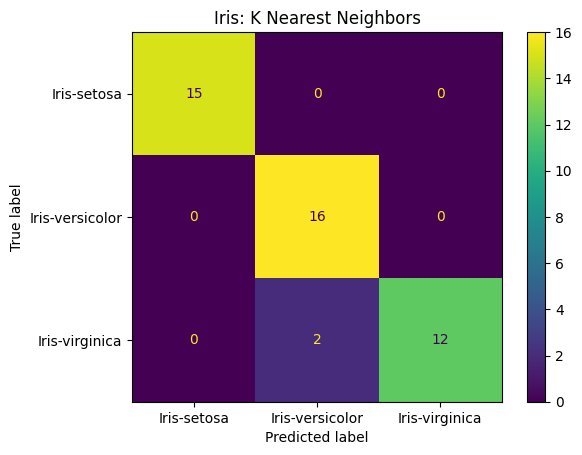

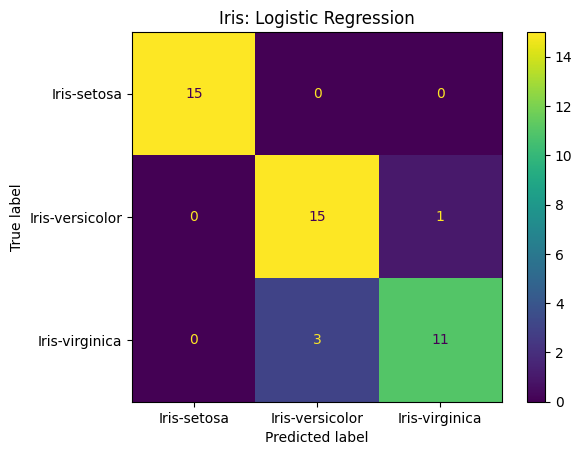

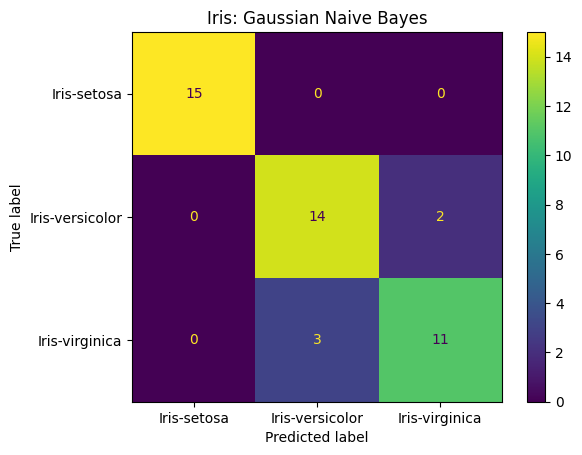

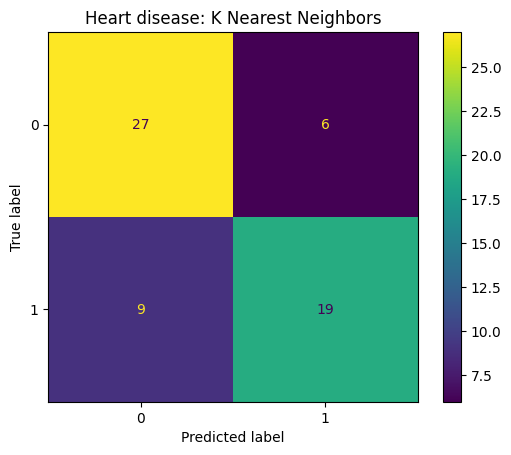

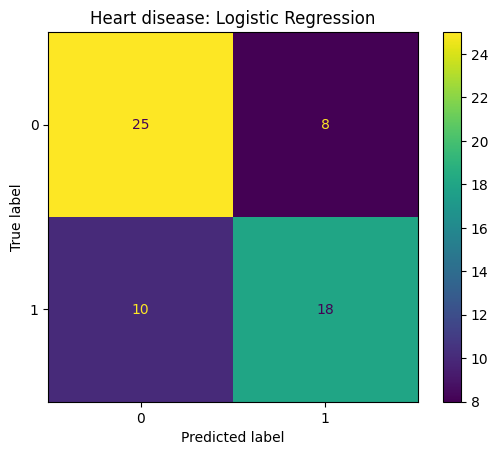

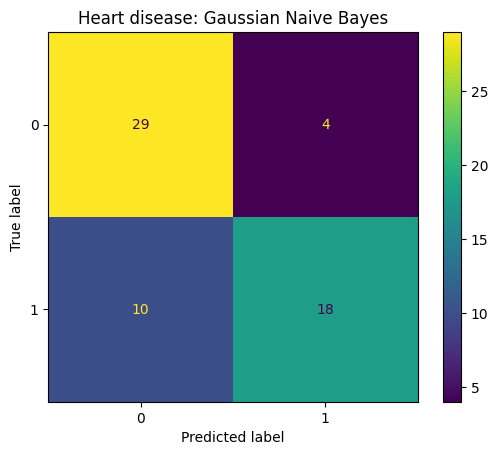

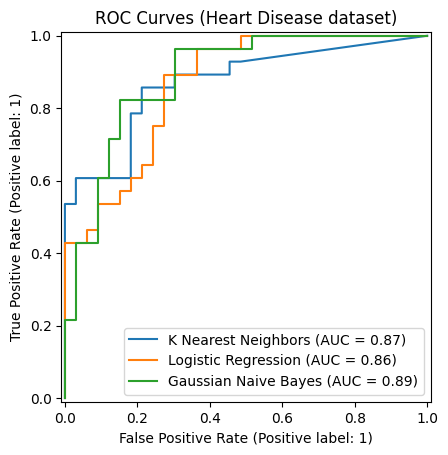

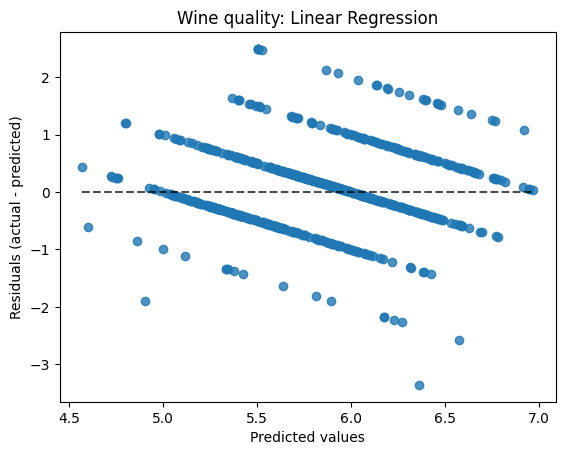

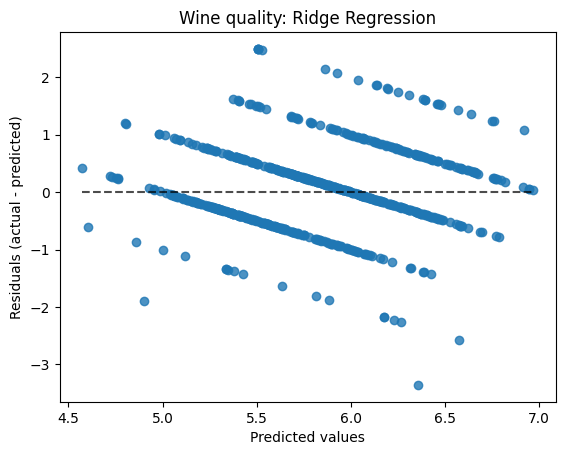

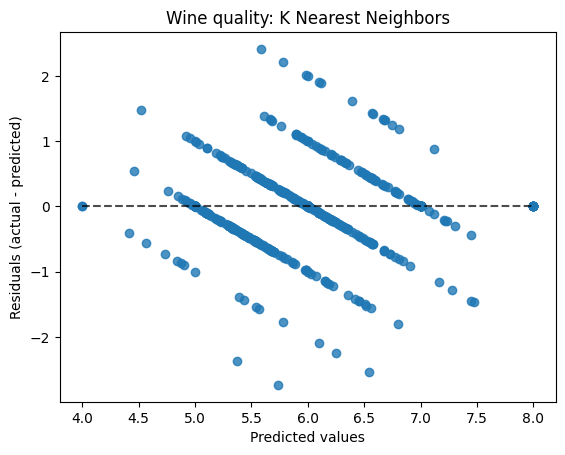

In [ ]:
# Iris confusion matrices

metrics.ConfusionMatrixDisplay.from_estimator(iKNN, iXte_s, iYte).ax_.set_title('Iris: K Nearest Neighbors')
metrics.ConfusionMatrixDisplay.from_estimator(iLGR, iXte_s, iYte).ax_.set_title('Iris: Logistic Regression')
metrics.ConfusionMatrixDisplay.from_estimator(iGNB, iXte_s, iYte).ax_.set_title('Iris: Gaussian Naive Bayes')

# Heart disease confusion matrices

metrics.ConfusionMatrixDisplay.from_estimator(hKNN, hXte_s, hYte).ax_.set_title('Heart disease: K Nearest Neighbors')
metrics.ConfusionMatrixDisplay.from_estimator(hLGR, hXte_s, hYte).ax_.set_title('Heart disease: Logistic Regression')
metrics.ConfusionMatrixDisplay.from_estimator(hGNB, hXte_s, hYte).ax_.set_title('Heart disease: Gaussian Naive Bayes')

# Heart disease ROC plots

_, ax = plt.subplots()

metrics.RocCurveDisplay.from_estimator(hKNN, hXte_s, hYte, ax=ax, name='K Nearest Neighbors')
metrics.RocCurveDisplay.from_estimator(hLGR, hXte_s, hYte, ax=ax, name='Logistic Regression')
metrics.RocCurveDisplay.from_estimator(hGNB, hXte_s, hYte, ax=ax, name='Gaussian Naive Bayes')

_ = ax.set_title('ROC Curves (Heart Disease dataset)')

# Wine quality metrics

wLNRmae = metrics.mean_absolute_error(wYte, wLNR.predict(wXte_s))
wRDGmae = metrics.mean_absolute_error(wYte, wRDG.predict(wXte_s))
wKNNmae = metrics.mean_absolute_error(wYte, wKNN.predict(wXte_s))
wLNRmse = metrics.mean_squared_error(wYte, wLNR.predict(wXte_s))
wRDGmse = metrics.mean_squared_error(wYte, wRDG.predict(wXte_s))
wKNNmse = metrics.mean_squared_error(wYte, wKNN.predict(wXte_s))
wLNRrmse = wLNRmse ** (1/2)
wRDGrmse = wRDGmse ** (1/2)
wKNNrmse = wKNNmse ** (1/2)
wLNRr2 = metrics.r2_score(wYte, wLNR.predict(wXte_s))
wRDGr2 = metrics.r2_score(wYte, wRDG.predict(wXte_s))
wKNNr2 = metrics.r2_score(wYte, wKNN.predict(wXte_s))

print('Wine quality regression metrics')
print('  Linear Regression')
print('    Mean absolute error:',     wLNRmae)
print('    Mean squared error:',      wLNRmse)
print('    Root mean squared error:', wLNRrmse)
print('    R² score:',                wLNRr2)
print('  Ridge Regression')
print('    Mean absolute error:',     wRDGmae)
print('    Mean squared error:',      wRDGmse)
print('    Root mean squared error:', wRDGrmse)
print('    R² score:',                wRDGr2)
print('  K Nearest Neighbors')
print('    Mean absolute error:',     wKNNmae)
print('    Mean squared error:',      wKNNmse)
print('    Root mean squared error:', wKNNrmse)
print('    R² score:',                wKNNr2)

# Wine quality prediction error plots

metrics.PredictionErrorDisplay.from_estimator(wLNR, wXte_s, wYte).ax_.set_title('Wine quality: Linear Regression')
metrics.PredictionErrorDisplay.from_estimator(wRDG, wXte_s, wYte).ax_.set_title('Wine quality: Ridge Regression')
metrics.PredictionErrorDisplay.from_estimator(wKNN, wXte_s, wYte).ax_.set_title('Wine quality: K Nearest Neighbors')
_ = '' # Prevent printing the last title